#### lxml  &  Gedicht (Version aus Gedichtband) mit xpath extrahieren

In [12]:
import lxml

In [16]:
from lxml import etree

In [166]:
import re

In [78]:
import pandas as pd

In [126]:
#speicherort
tree = etree.parse("C:/Users/jO/Desktop/DH_MA_Arbeit/coding/vielleicht weil endversion.xml")

In [214]:
# text aus allen tags innerhalb des div-tags; namespaces: tei
poem = tree.xpath("//tei:div[@type='Gedicht']/descendant-or-self::text()", namespaces={"tei": "http://www.tei-c.org/ns/1.0"})

poem_text = " ".join(poem)
print(poem_text)


         vielleicht weil das Auge zuerst bricht 
         
         der Körper will 
         sich ja schlieszen! rufst du Verdrusz und 
         Krankheit der Witwe : Göttin  
         aus der Maschine, die grünen  
         Zigeunerkarten plötzlich aus der Tasche gezogen 
         vermischt, dreimal abheben! linkshändig! die 
         Rosalia sichtbar zu machen (bewaldet), wir 
         essen kleine Drachen den Mond, das 
         Land ist Löwe viel Hitze Pomeji Kunstwellen Kälber- 
         leib Bekröter sogar : Wahrträume - wie 
         mit vielen Augen aus jeder Pfütze getrunken, die  
         Vögel picken das menschliche Auge zuerst aus, alles 
         verflochten Krankheit Verdrusz Säge 
         des Laubs, mein  
         Gaumen krümmt sich aber es ist kein Schatz  
         zugegen, die Treue Beständigkeit 
         aus den Karten gelesen, Werktreue? rufe ich, Asche 
         werden, Stativ deiner Beine, Schläfe mit  
         Kappe, Oktoberkeule dein schnarrendes         

In [215]:
poem_text.replace("\n", "").replace("\r", "")

'         vielleicht weil das Auge zuerst bricht                   der Körper will          sich ja schlieszen! rufst du Verdrusz und          Krankheit der Witwe : Göttin           aus der Maschine, die grünen           Zigeunerkarten plötzlich aus der Tasche gezogen          vermischt, dreimal abheben! linkshändig! die          Rosalia sichtbar zu machen (bewaldet), wir          essen kleine Drachen den Mond, das          Land ist Löwe viel Hitze Pomeji Kunstwellen Kälber-          leib Bekröter sogar : Wahrträume - wie          mit vielen Augen aus jeder Pfütze getrunken, die           Vögel picken das menschliche Auge zuerst aus, alles          verflochten Krankheit Verdrusz Säge          des Laubs, mein           Gaumen krümmt sich aber es ist kein Schatz           zugegen, die Treue Beständigkeit          aus den Karten gelesen, Werktreue? rufe ich, Asche          werden, Stativ deiner Beine, Schläfe mit           Kappe, Oktoberkeule dein schnarrendes                             

In [217]:
poem_text = " ".join(poem_text.strip().split())

In [218]:
# Vereinheitlichung: "sz" zu "ß" (für spätere Text und Wortarterkennung)
poem_text.replace("sz", "ß")

'vielleicht weil das Auge zuerst bricht der Körper will sich ja schließen! rufst du Verdruß und Krankheit der Witwe : Göttin aus der Maschine, die grünen Zigeunerkarten plötzlich aus der Tasche gezogen vermischt, dreimal abheben! linkshändig! die Rosalia sichtbar zu machen (bewaldet), wir essen kleine Drachen den Mond, das Land ist Löwe viel Hitze Pomeji Kunstwellen Kälber- leib Bekröter sogar : Wahrträume - wie mit vielen Augen aus jeder Pfütze getrunken, die Vögel picken das menschliche Auge zuerst aus, alles verflochten Krankheit Verdruß Säge des Laubs, mein Gaumen krümmt sich aber es ist kein Schatz zugegen, die Treue Beständigkeit aus den Karten gelesen, Werktreue? rufe ich, Asche werden, Stativ deiner Beine, Schläfe mit Kappe, Oktoberkeule dein schnarrendes Maulhorn ach wo unsere Schatten einander entgegen sind -'

#### spacy : tokenize

In [3]:
import spacy

In [11]:
nlp = spacy.load("de_core_news_sm")

In [209]:
text = nlp(poem_text)

In [219]:
#tokenize
for token in text:
    tokenized_poem = token.text
    print(tokenized_poem)

vielleicht
weil
das
Auge
zuerst
bricht
der
Körper
will
sich
ja
schlieszen
!
rufst
du
Verdrusz
und
Krankheit
der
Witwe
:
Göttin
aus
der
Maschine
,
die
grünen
Zigeunerkarten
plötzlich
aus
der
Tasche
gezogen
vermischt
,
dreimal
abheben
!
linkshändig
!
die
Rosalia
sichtbar
zu
machen
(
bewaldet
)
,
wir
essen
kleine
Drachen
den
Mond
,
das
Land
ist
Löwe
viel
Hitze
Pomeji
Kunstwellen
Kälber-
leib
Bekröter
sogar
:
Wahrträume
-
wie
mit
vielen
Augen
aus
jeder
Pfütze
getrunken
,
die
Vögel
picken
das
menschliche
Auge
zuerst
aus
,
alles
verflochten
Krankheit
Verdrusz
Säge
des
Laubs
,
mein
Gaumen
krümmt
sich
aber
es
ist
kein
Schatz
zugegen
,
die
Treue
Beständigkeit
aus
den
Karten
gelesen
,
Werktreue
?
rufe
ich
,
Asche
werden
,
Stativ
deiner
Beine
,
Schläfe
mit
Kappe
,
Oktoberkeule
dein
schnarrendes
Maulhorn
ach
wo
unsere
Schatten
einander
entgegen
sind
-


In [211]:
#pos-tagging etc.
for token in text:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_)

vielleicht vielleicht ADV ADV mo
weil weil SCONJ KOUS cp
das der DET ART nk
Auge Auge NOUN NN sb
zuerst zuerst ADV ADV mo
bricht brechen VERB VVFIN ROOT
der der DET ART nk
Körper Körper NOUN NN sb
will wollen AUX VMFIN cj
sich sich PRON PRF oa
ja ja ADV ADV mo
schlieszen Schliesz NOUN NN oc
! -- PUNCT $. punct
rufst rufst X VVFIN ROOT
du du PROPN PPER sb
Verdrusz Verdrusz PROPN NE oa
und und CCONJ KON cd
Krankheit Krankheit NOUN NN cj
der der DET ART nk
Witwe Witwe NOUN NN ag
: -- PUNCT $. punct
Göttin Göttin NOUN NN mo
aus aus ADP APPR mo
der der DET ART nk
Maschine Maschine NOUN NN nk
, -- PUNCT $, punct
die der DET ART nk
grünen grün ADJ ADJA nk
Zigeunerkarten Zigeunerkarte NOUN NN sb
plötzlich plötzlich ADV ADJD mo
aus aus ADP APPR mo
der der DET ART nk
Tasche Tasche NOUN NN nk
gezogen ziehen VERB VVPP oc
vermischt vermischen VERB VVFIN rc
, -- PUNCT $, punct
dreimal dreimal ADV ADV mo
abheben abheben VERB VVINF ROOT
! -- PUNCT $. punct
linkshändig linkshändig ADV ADJD ROOT
! -- PU

https://universaldependencies.org/u/pos/

In [220]:
poem_info = []
for token in text:
  #  if "\n" not in token.text:
        poem_info.append({
            'text': token.text,
            'pos': token.pos_,
            'tag': token.tag_,
            'dep': token.dep_,
            'lemma': token.lemma_})

In [221]:
poem_info_df = pd.DataFrame(poem_info)
poem_info_df.to_csv('poem_info.csv', index=False)
poem_info_df.head(10)

,text,pos,tag,dep,lemma
0,vielleicht,ADV,ADV,mo,vielleicht
1,weil,SCONJ,KOUS,cp,weil
2,das,DET,ART,nk,der
3,Auge,NOUN,NN,sb,Auge
4,zuerst,ADV,ADV,mo,zuerst
5,bricht,VERB,VVFIN,ROOT,brechen
6,der,DET,ART,nk,der
7,Körper,NOUN,NN,sb,Körper
8,will,AUX,VMFIN,cj,wollen
9,sich,PRON,PRF,oa,sich


In [225]:
pos_dist = poem_info_df["pos"].value_counts()
print(pos_dist)

pos
NOUN     36
DET      23
PUNCT    23
VERB     13
ADV      12
ADP      10
PRON      6
ADJ       6
AUX       5
PROPN     5
SCONJ     2
X         2
CCONJ     1
PART      1
Name: count, dtype: int64


In [235]:
poem_info_df[poem_info_df["pos"] == "X"]

,text,pos,tag,dep,lemma
13,rufst,X,VVFIN,ROOT,rufst
65,Kälber-,X,VVFIN,mo,Kälber-


<Axes: xlabel='pos'>

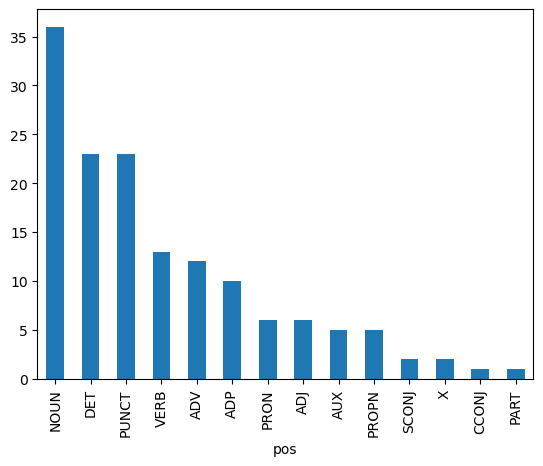

In [231]:
pos_dist.plot.bar()

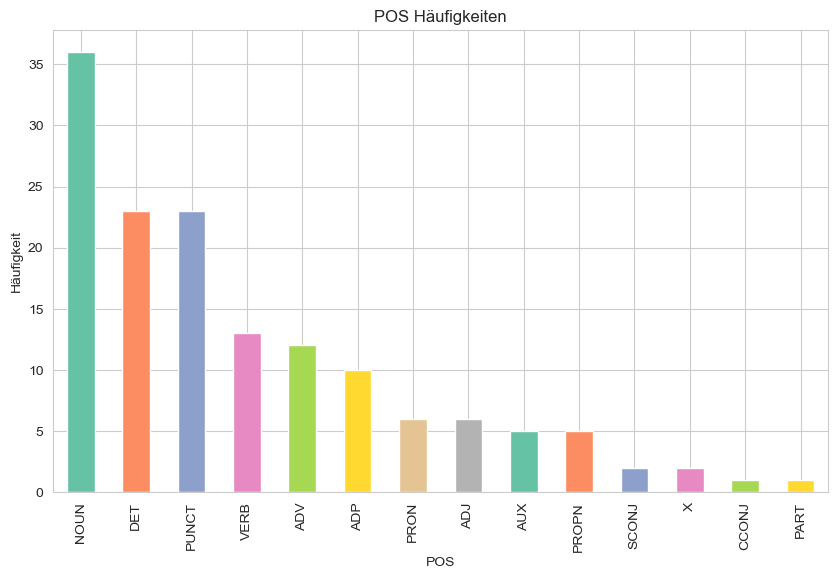

In [233]:
import seaborn as sns
import matplotlib.pyplot as plt

# seaborn
sns.set_style("whitegrid")

# color palette
palette = "Set2"

# Plot
pos_dist.plot(kind='bar', color=sns.color_palette(palette), figsize=(10, 6))
plt.xlabel('POS')
plt.ylabel('Häufigkeit')
plt.title('POS Häufigkeiten')
plt.show()

In [75]:
from spacy import displacy

In [143]:
displacy.serve(text, style="dep")

C:\Users\jO\anaconda3\Lib\site-packages\spacy\displacy\__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.
